# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
latitudes=np.append(lats,18.137907)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
longitudes=np.append(lngs,-94.137667)
lat_lngs = zip(latitudes, longitudes)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

603


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Lists of atributes
name=[]
cloud=[]
country=[]
date=[]
humidity=[]
latitude=[]
longitude=[]
max_temp=[]
wind_speed=[]
not_found=[]

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

record=1
error=1

print("Beggining data retrieval")
print("-------------------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f'Processing Record {record} | {city}')
        record = record+1
    except KeyError:
        not_found.append(city)
        print(f"City not found. {error} error(s). Skipping...")
        error=error+1
        
print("-------------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------------")

Beggining data retrieval
-------------------------------------------
Processing Record 1 | puerto ayora
Processing Record 2 | new norfolk
Processing Record 3 | chokurdakh
City not found. 1 error(s). Skipping...
Processing Record 4 | killybegs
Processing Record 5 | castro
Processing Record 6 | mataura
Processing Record 7 | atuona
Processing Record 8 | ostersund
Processing Record 9 | kapaa
Processing Record 10 | awbari
Processing Record 11 | ponta do sol
Processing Record 12 | cheremnoye
Processing Record 13 | katangli
City not found. 2 error(s). Skipping...
Processing Record 14 | buala
City not found. 3 error(s). Skipping...
Processing Record 15 | tondano
Processing Record 16 | bredasdorp
Processing Record 17 | buzmeyin
Processing Record 18 | albany
Processing Record 19 | pundaguitan
Processing Record 20 | vanimo
Processing Record 21 | te anau
Processing Record 22 | namatanai
Processing Record 23 | hermanus
Processing Record 24 | fukue
Processing Record 25 | powell river
Processing Reco

Processing Record 218 | isiro
Processing Record 219 | panjab
Processing Record 220 | natal
Processing Record 221 | teya
Processing Record 222 | zambezi
Processing Record 223 | muroto
Processing Record 224 | belmonte
Processing Record 225 | kanker
City not found. 26 error(s). Skipping...
Processing Record 226 | komsomolskiy
Processing Record 227 | mahibadhoo
Processing Record 228 | lompoc
Processing Record 229 | novichikha
Processing Record 230 | katsuura
Processing Record 231 | faanui
Processing Record 232 | nizhniy tsasuchey
Processing Record 233 | hithadhoo
Processing Record 234 | russell
Processing Record 235 | ponta delgada
Processing Record 236 | pierre
City not found. 27 error(s). Skipping...
Processing Record 237 | puerto suarez
City not found. 28 error(s). Skipping...
City not found. 29 error(s). Skipping...
Processing Record 238 | batagay-alyta
Processing Record 239 | yulara
City not found. 30 error(s). Skipping...
Processing Record 240 | itarema
Processing Record 241 | torbat

Processing Record 438 | nanortalik
Processing Record 439 | lensk
Processing Record 440 | bandarbeyla
Processing Record 441 | sarkand
Processing Record 442 | naryan-mar
Processing Record 443 | vaitape
Processing Record 444 | ahuimanu
Processing Record 445 | paita
Processing Record 446 | praia da vitoria
Processing Record 447 | mount isa
Processing Record 448 | jiazi
Processing Record 449 | lazi
Processing Record 450 | imeni poliny osipenko
Processing Record 451 | marsa matruh
Processing Record 452 | lhokseumawe
Processing Record 453 | aloleng
Processing Record 454 | dunedin
Processing Record 455 | matagami
Processing Record 456 | trincomalee
Processing Record 457 | isla vista
Processing Record 458 | meulaboh
Processing Record 459 | portland
Processing Record 460 | okhotsk
Processing Record 461 | karakol
City not found. 47 error(s). Skipping...
Processing Record 462 | broome
Processing Record 463 | beyneu
Processing Record 464 | santiago del estero
Processing Record 465 | hokitika
Proces

In [20]:
response = requests.get(query_url + 'agua dulce').json()
print(response)

{'coord': {'lon': -94.13, 'lat': 18.13}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.65, 'feels_like': 26.28, 'temp_min': 22.65, 'temp_max': 22.65, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 1008}, 'wind': {'speed': 0.74, 'deg': 181}, 'clouds': {'all': 1}, 'dt': 1585651139, 'sys': {'country': 'MX', 'sunrise': 1585656661, 'sunset': 1585700980}, 'timezone': -21600, 'id': 3533269, 'name': 'Agua Dulce', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(r'..\Output\Weather_Data.csv', index = False)

weather_data.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [5]:
weather_data.head(11)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,1,EC,1585650989,87,-0.74,-90.35,24.44,2.99
1,New Norfolk,40,AU,1585650989,62,-42.78,147.06,16.11,1.00
2,Chokurdakh,100,RU,1585650989,92,70.63,147.92,-19.74,2.93
3,Killybegs,90,IE,1585650990,81,54.63,-8.45,8.33,2.60
4,Castro,10,BR,1585650901,52,-24.79,-50.01,21.55,0.77
5,Mataura,34,NZ,1585650990,93,-46.19,168.86,12.22,1.01
6,Atuona,9,PF,1585650991,72,-9.80,-139.03,27.81,6.52
7,Östersund,75,SE,1585650991,69,63.18,14.64,4.00,11.80
8,Kapaa,90,US,1585650991,88,22.08,-159.32,23.00,5.10
9,Ubari,51,LY,1585650991,15,26.59,12.78,25.66,4.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

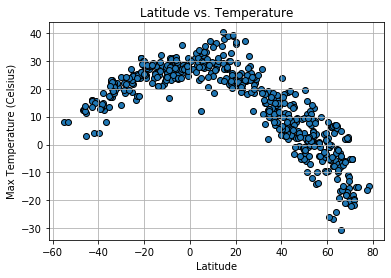

In [6]:
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('Latitude vs. Temperature')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

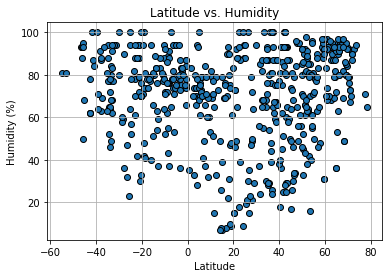

In [7]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

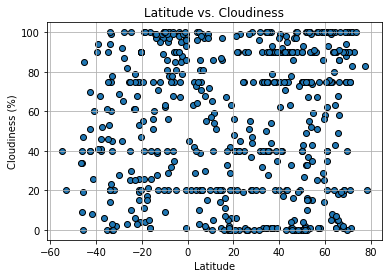

In [8]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

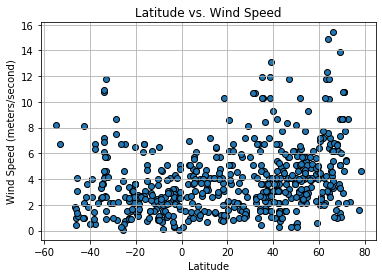

In [9]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meters/second)')
plt.title('Latitude vs. Wind Speed')
plt.grid()
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def reglin(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    rval=f'r value = {"{:.2f}".format(rvalue)}'
    return regress_values,line_eq,rval 

In [11]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi=weather_data[weather_data['Lat']>=0]
south_hemi=weather_data[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

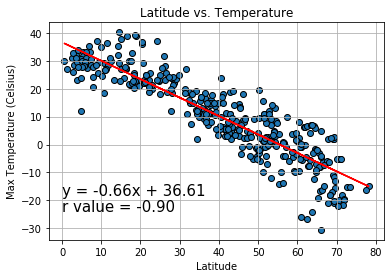

In [12]:
regress_values,line_eq,rval=reglin(north_hemi['Lat'],north_hemi['Max Temp'])
plt.scatter(north_hemi['Lat'],north_hemi['Max Temp'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('Latitude vs. Temperature')
plt.grid()
plt.plot(north_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(0,-18),fontsize=15,color="black")
plt.annotate(rval,(0,-24),fontsize=15,color="black")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

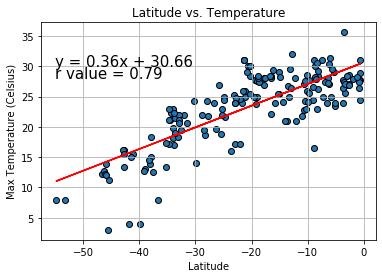

In [13]:
regress_values,line_eq,rval=reglin(south_hemi['Lat'],south_hemi['Max Temp'])
plt.scatter(south_hemi['Lat'],south_hemi['Max Temp'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('Latitude vs. Temperature')
plt.grid()
plt.plot(south_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(-55,30),fontsize=15,color="black")
plt.annotate(rval,(-55,28),fontsize=15,color="black")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

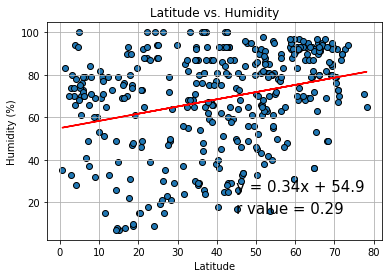

In [14]:
regress_values,line_eq,rval=reglin(north_hemi['Lat'],north_hemi['Humidity'])
plt.scatter(north_hemi['Lat'],north_hemi['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid()
plt.plot(north_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(45,25),fontsize=15,color="black")
plt.annotate(rval,(45,15),fontsize=15,color="black")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

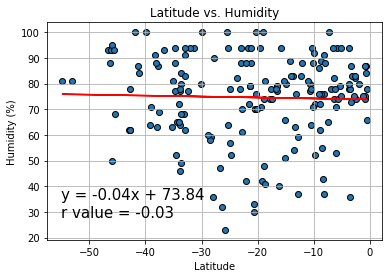

In [15]:
regress_values,line_eq,rval=reglin(south_hemi['Lat'],south_hemi['Humidity'])
plt.scatter(south_hemi['Lat'],south_hemi['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid()
plt.plot(south_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(-55,35),fontsize=15,color="black")
plt.annotate(rval,(-55,28),fontsize=15,color="black")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

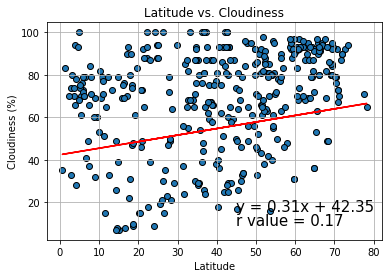

In [16]:
regress_values,line_eq,rval=reglin(north_hemi['Lat'],north_hemi['Cloudiness'])
plt.scatter(north_hemi['Lat'],north_hemi['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid()
plt.plot(north_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(45,16),fontsize=15,color="black")
plt.annotate(rval,(45,9),fontsize=15,color="black")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

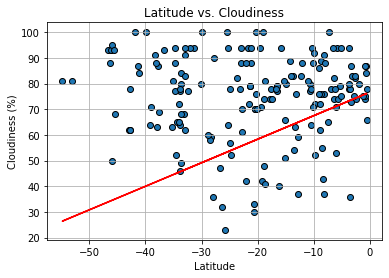

In [17]:
regress_values,line_eq,rval=reglin(south_hemi['Lat'],south_hemi['Cloudiness'])
plt.scatter(south_hemi['Lat'],south_hemi['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid()
plt.plot(south_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(-48,18),fontsize=15,color="black")
plt.annotate(rval,(-18,18),fontsize=15,color="black")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

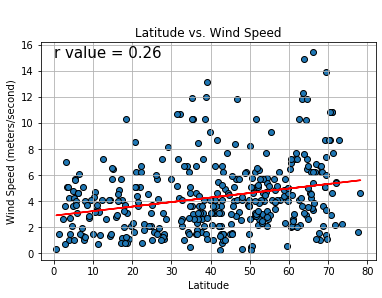

In [18]:
regress_values,line_eq,rval=reglin(north_hemi['Lat'],north_hemi['Wind Speed'])
plt.scatter(north_hemi['Lat'],north_hemi['Wind Speed'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meters/second)')
plt.title('Latitude vs. Wind Speed')
plt.grid()
plt.plot(north_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(0,18),fontsize=15,color="black")
plt.annotate(rval,(0,15),fontsize=15,color="black")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

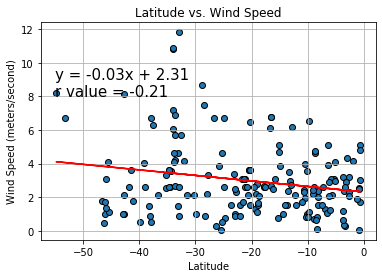

In [19]:
regress_values,line_eq,rval=reglin(south_hemi['Lat'],south_hemi['Wind Speed'])
plt.scatter(south_hemi['Lat'],south_hemi['Wind Speed'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meters/second)')
plt.title('Latitude vs. Wind Speed')
plt.grid()
plt.plot(south_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(-55,9),fontsize=15,color="black")
plt.annotate(rval,(-55,8),fontsize=15,color="black")
plt.show()